epoch:0, loss:52588547.22302942, w:0.6598350000000001, b=:1.6598350000000002
epoch:1, loss:50953387.24984498, w:0.886611355575, b=:1.8866113555750001
epoch:2, loss:41215029.9316838, w:2.3263264628867995, b=:3.3263264628868
epoch:3, loss:26172017.32176445, w:4.980571464177869, b=:5.98057146417787
epoch:4, loss:22526419.419804316, w:5.747892553661795, b=:6.747892553661796
epoch:5, loss:11510803.836348576, w:8.67675196074195, b=:9.67675196074195
epoch:6, loss:7204118.337253964, w:10.386732119890526, b=:11.386732119890526
epoch:7, loss:7137851.863346735, w:10.419027378632766, b=:11.419027378632766
epoch:8, loss:7335569.254603013, w:10.323458292487496, b=:11.323458292487496
epoch:9, loss:7273515.700537683, w:10.353199156902875, b=:11.353199156902875
epoch:10, loss:3924808.8615079755, w:12.635634147031194, b=:13.635634147031194
epoch:11, loss:3414289.0532051036, w:13.429307732092166, b=:14.429307732092166
epoch:12, loss:3255864.4016035693, w:13.99911640912474, b=:14.99911640912474
epoch:13, 

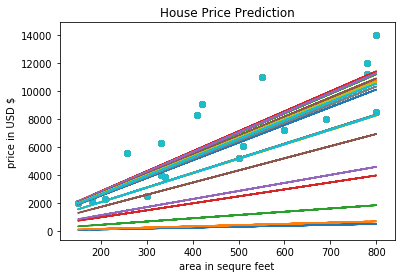

In [8]:
def read_file(fileName):
    import pandas as pd
    df=pd.read_csv(fileName)
    return df

def update_w_and_b(area,price,w,b,alpha,i):
    dc_dw=0.0
    dc_db=0.0
    N=len(area)
    dc_dw+=-2*area[i]*(price[i]-(w*area[i]+b))
    dc_db+=-2*area[i]*(price[i]-(w*area[i]+b))
    #update w and b
    w=w-(1/float(N))*dc_dw*alpha
    b=b-(1/float(N))*dc_db*alpha

    return w,b

def train(area,price,w,b,alpha):
    N=len(area)
    y_pred=[]
    for e in range(N):        
        #updating value of w and b
        w,b=update_w_and_b(area,price,w,b,alpha,e)
        if e%1==0:
            for i in range(N):
                y_pred.append(area[i]*w+b)
            
            print('epoch:{}, loss:{}, w:{}, b=:{}'.format(e,avg_loss(area,price,w,b),w,b))
            draw_data(area,price,y_pred)
            y_pred=[]

    return w,b


def avg_loss(area,price,w,b):
    N=len(area)
    total_error=0.0
    for i in range(N):
        total_error+=((w*area[i]+b)-price[i])**2
    return total_error/float(N)

def draw_data(x,y,y_pred):
    import matplotlib.pyplot as plt
    plt.title('House Price Prediction')
    plt.xlabel('area in sequre feet')
    plt.ylabel('price in USD $')
    plt.scatter(x,y)
    plt.plot(x,y_pred)

def predict(x,w,b):
    return w*x+b
    


df=read_file('data.csv')

# dummy data 
#area=[7,7,6,6,5,5,4,4,3,3,2,2,1,1]
#price=[9,8,8,7,7,6,6,5,5,4,4,3,3,2]

area=df.area[0:21]
price=df.price[0:21]
w=0.0
b=1.0
alpha=0.000005
ephocs=9
w,b=train(area,price,w,b,alpha)
x=int(input('Enter the area of the house:: '))
y=predict(x,w,b)
print('your house would be sell at: {} USD$'.format(y))